In [1]:
import sys
# Adjust the path based on your specific folder structure
sys.path.append('../../classifiers/models/segment-anything')
from segment_anything import SamPredictor, sam_model_registry
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import torch


In [2]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))  

In [3]:
folder_path = '../data/train/nevus/' # replace with your folder path
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Select 10 images randomly or just the first 10 if there are not many
selected_images = image_files[:10]


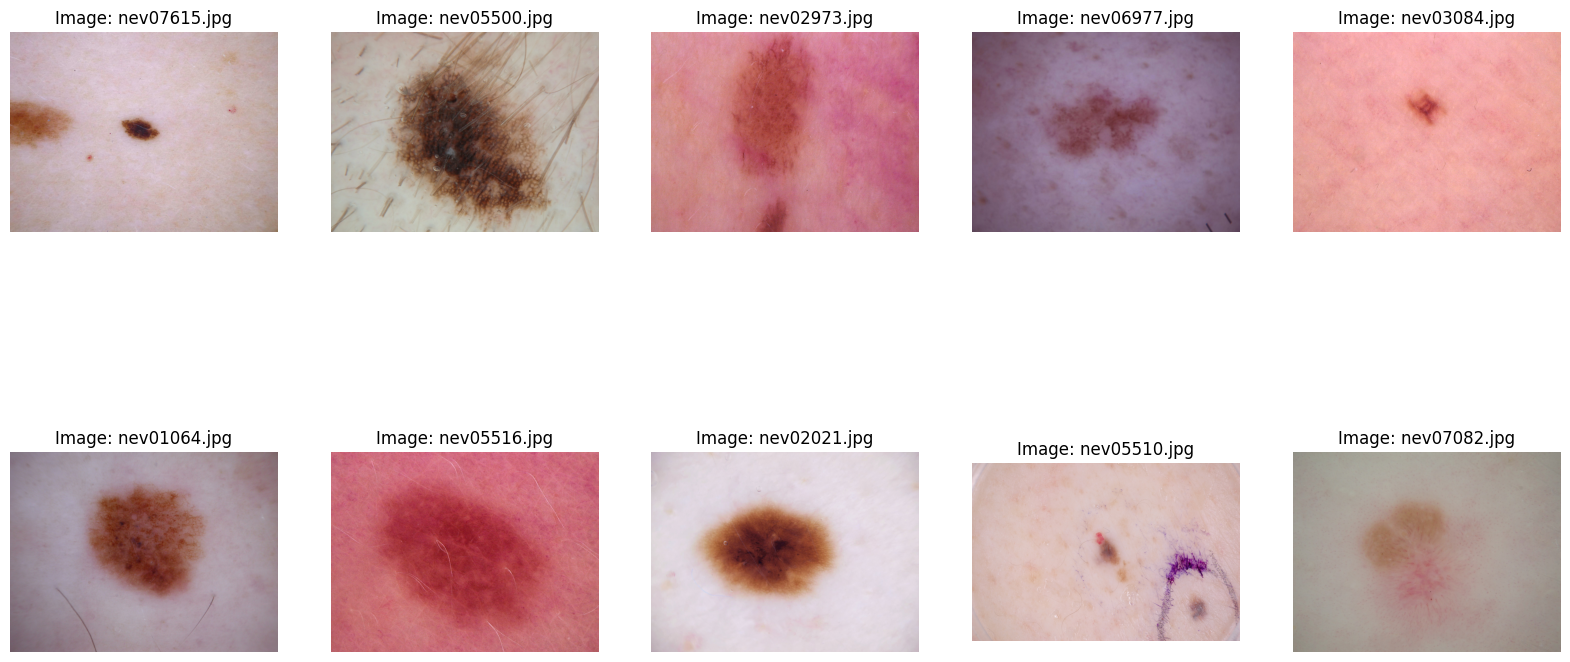

In [4]:
plt.figure(figsize=(20, 10))  # Adjust the size as needed

for i, img_file in enumerate(selected_images):
    img_path = os.path.join(folder_path, img_file)
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)  # Adjust grid size (2 rows, 5 columns) based on number of images
    plt.imshow(img)
    plt.title(f"Image: {img_file}")
    plt.axis('off')

plt.show()


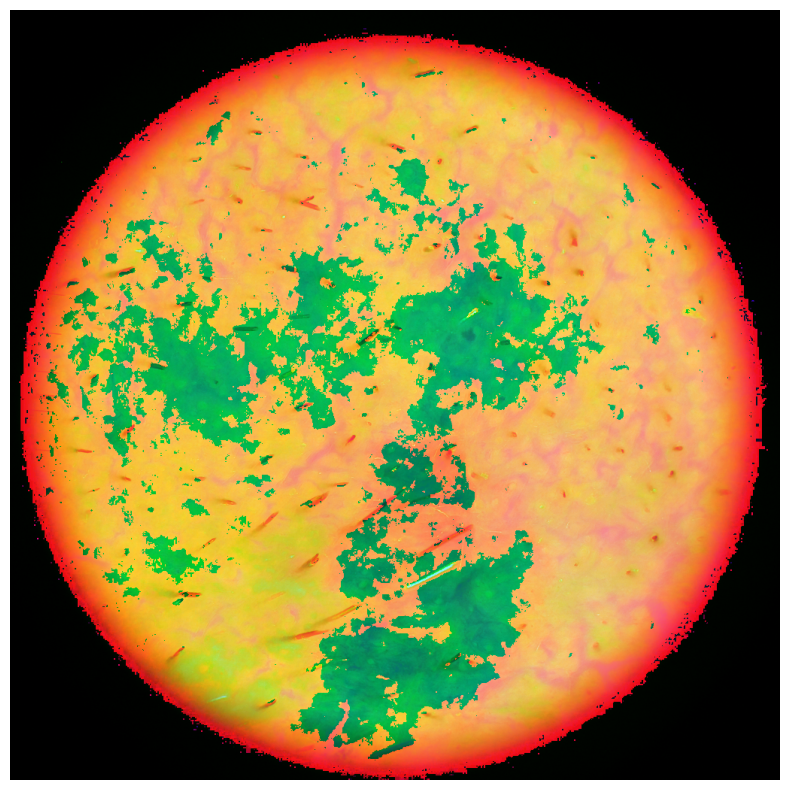

In [13]:
image = cv.imread('../data/train/others/mel01933.jpg')
image = cv.cvtColor(image, cv.COLOR_BGR2HLS_FULL)

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/home/edalita/Documents/MAIA/3-Semestre/CADx/melanoma_deep_learning/classifiers/models/segment-anything/segment_anything/checkpoint/sam_vit_h_4b8939.pth"
model_type = "vit_h"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device='cpu',dtype=torch.float, non_blocking=True)

predictor = SamPredictor(sam)

In [7]:
predictor.set_image(image)

In [8]:
input_point = np.array([[700, 550]])
input_label = np.array([0])


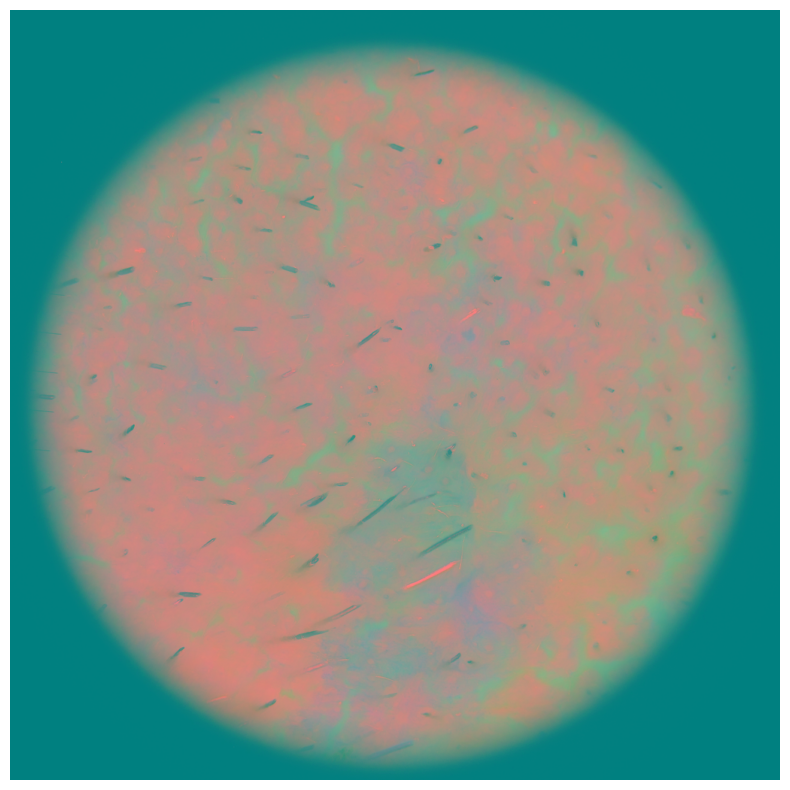

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(image)
#show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()  

In [10]:
masks, scores, logits = predictor.predict(
    #point_coords=input_point,
    #point_labels=input_label,
    multimask_output=True
)

In [11]:
masks.shape  # (number_of_masks) x H x W

(3, 1024, 1024)

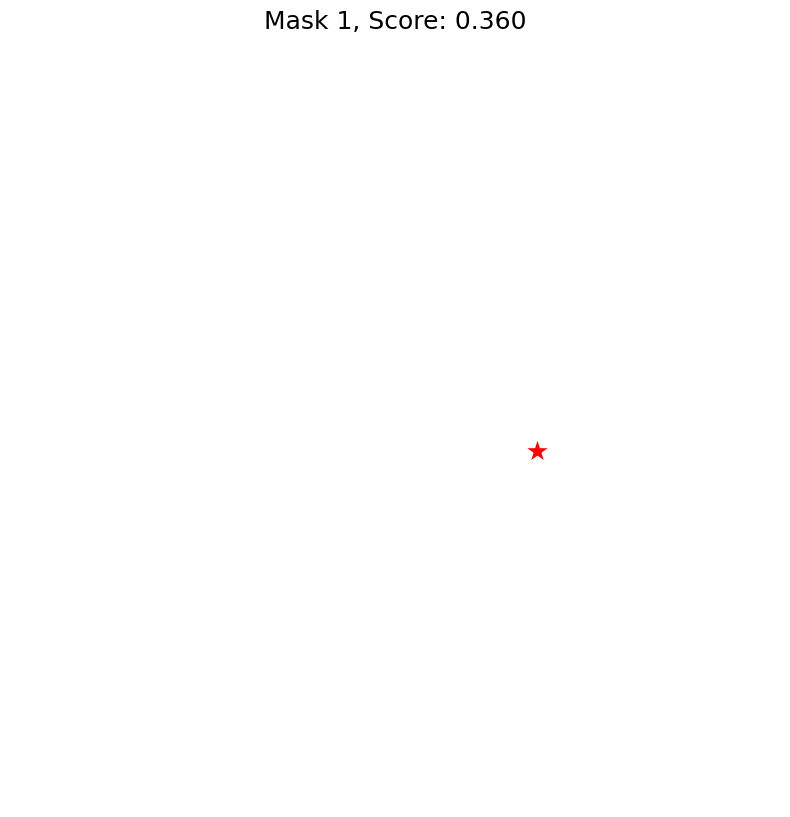

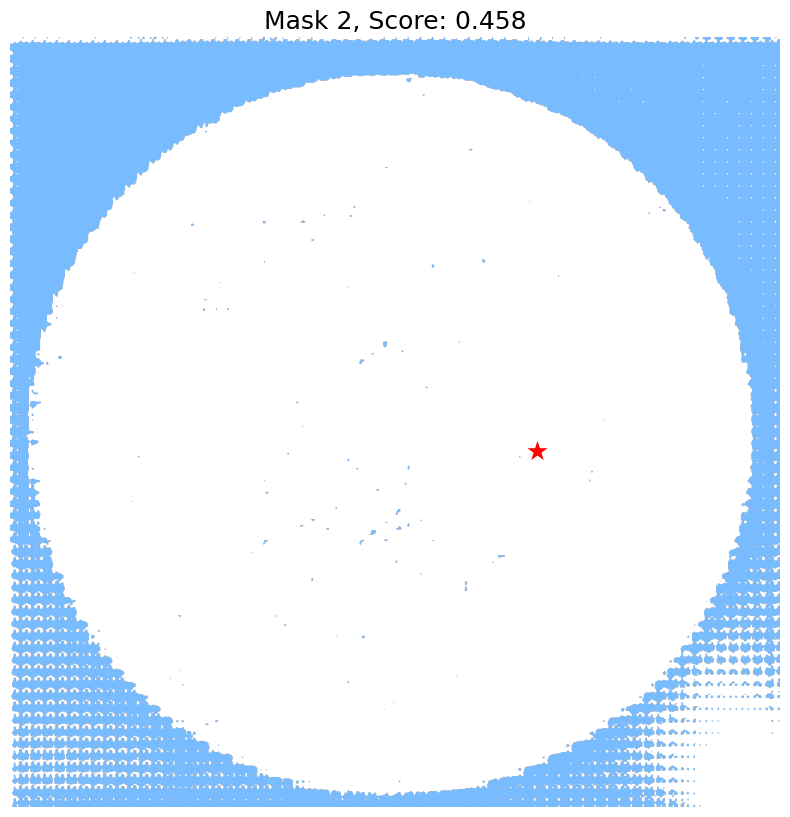

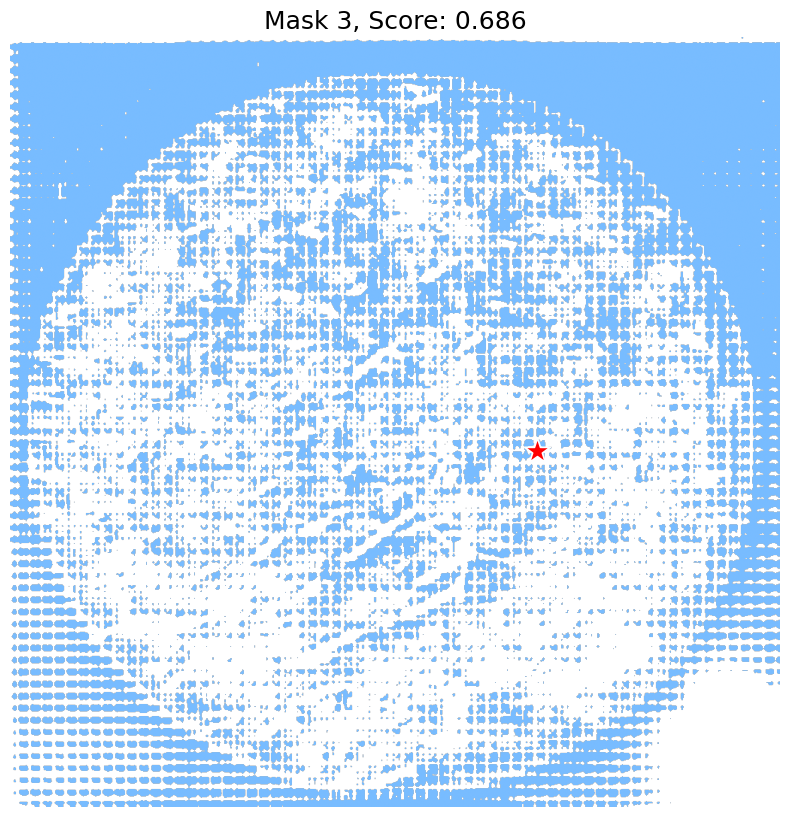

In [12]:
for i, (mask, score) in enumerate(zip(masks, scores)):
    plt.figure(figsize=(10,10))
    #plt.imshow(image)
    show_mask(mask, plt.gca())
    show_points(input_point, input_label, plt.gca())
    plt.title(f"Mask {i+1}, Score: {score:.3f}", fontsize=18)
    plt.axis('off')
    plt.show() 